# 拡張カルマンフィルタ

ベイズベースの自己位置推定アルゴリズムのおさらい

パーティクルフィルタも同様

## 状態遷移について

$$
\hat{b}_{t}({\bf x}) = \int_{{\bf x}^{\prime} \in \mathit X} p({\bf x} \mid {\bf x}^{\prime}, {\bf \nu}_{t}) b_{t-1}({\bf x}^{\prime}) d{\bf x}^{\prime}
$$

$p({\bf x} \mid {\bf x}^{\prime}, {\bf \nu}_{t})$は状態遷移モデル

$b_{t-1}({\bf x}^{\prime})$はある姿勢${\bf x}^{\prime}$での遷移前の信念密度

これを全姿勢について足し合わせるという意味

これにより遷移後の信念密度が求まる

## 観測の反映について

ベイズがつかえる

$$
b_{t}({\bf x}) = \hat{b}_{t}({\bf x} \mid {\bf z}_{t}) = \frac{p({\bf z}_{t} \mid {\bf x}) \hat{b}_{t}({\bf x})}{p({\bf z}_{t})} = \eta p({\bf z}_{t} \mid {\bf x}) \hat{b}_{t}({\bf x})
$$

$p({\bf z}_{t} \mid {\bf x})$は観測モデル

センサ値が観測毎に独立なら

$$
b_{t}({\bf x}) = \eta \hat{b}_{t}({\bf x}) \prod_{j=0}^{N_{m}-1}p_{j}({\bf z}_{j,t} \mid {\bf x})
$$

となる

In [1]:
import sys
sys.path.append('../src')
import importlib

import worlds
import maps
import numpy as np
import robots
import sensors
import agents
import landmarks
import estimators

In [2]:
# 検証用の関数
def trial():
    time_interval = 0.1
    world = worlds.World(30., time_interval, debuggable=True)
    
    m = maps.Map()
    for ln in [(-4., 2.), (2., -3.), (3., 3.)]:
        m.append_landmark(landmarks.Point2DLandmark(*ln))
    world.append(m)
    
    initial_pose = np.array([0., 0., 0.]).T
    estimator = estimators.ExtendedKalmanFilter(
        m, initial_pose, distance_dev_rate=0.14, direction_dev=0.05)
    
    a = agents.EstimationAgent(
        time_interval, 0.2, 10./180.*np.pi, estimator=estimator)
    
    r = robots.Robot(initial_pose, sensor=sensors.Camera(m), agent=a, color='red')
    world.append(r)
    
    world.draw()

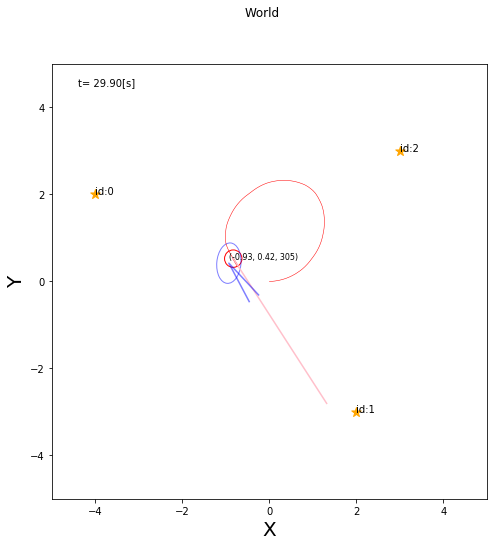

In [3]:
trial()